_Note: This Python notebook assumes that this is your first time to see/work on a Python code. It also assumes that you are new to recommendation systems, but familiar with it as a high-level concept._ 

# VANILLA COLLABORTIVE FILTERING

_Prepared for EMBA 2022 by EF Legara_

---

Here, we use Python libraries to help us with some of our computations and data visualization. Think of them as collection of pre-written formulae that we can utilize so we don't have to explixitly write the formulae ourselves. The following libraries are used. You can click on the link to find out more about them.

- [pandas](https://pandas.pydata.org/) - Python data analysis library
- [matplotlib](https://matplotlib.org/) - a plotting library for Python
- [seaborn](https://seaborn.pydata.org/) - for statistical visualization
- [numpy](https://numpy.org/) - for numerical computing in Python
- [sklearn](https://scikit-learn.org/stable/) - ML in Python

Below is the "code cell" that we run to load the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

%matplotlib inline

---
## Loading the Data
_This data was generated from the EMBA 2019 class._

`df` is the variable we use for our dataframe or table. You may use other variable names, of course. 

Here, we load the data that stored in an MS in Excel file named `movie recom.xlsx` to a table that we call `df` (a dataframe).

In [2]:
df = pd.read_excel('./data/movie recom.xlsx')

Let's take a look at what's inside `df`. The `.head()` function  just tells Python to print the first five rows of the dataframe.

In [3]:
df.head()

,Name,Matrix,Inception,Titanic,Amélie,Love Actually,Terminator,Elysium,Avatar
0,Person 1,5,5,4,0,0,3,0,5
1,Person 2,5,5,1,4,3,4,2,4
2,Person 3,0,0,3,4,5,0,0,0
3,Person 4,4,4,4,0,3,3,2,5
4,Person 5,1,0,3,0,0,3,2,4


The table above currently has nine columns which include the **Name** column and the eight other columns for the movies. For ease of analysis, we can set the _index_ of each row in the table using the **Name** of clients or users. You can think of the index as the row number or row name.

In [4]:
df = df.set_index('Name')

Here's how are dataframe looks like.

In [5]:
df.head()

,Matrix,Inception,Titanic,Amélie,Love Actually,Terminator,Elysium,Avatar
Name,,,,,,,,
Person 1,5,5,4,0,0,3,0,5
Person 2,5,5,1,4,3,4,2,4
Person 3,0,0,3,4,5,0,0,0
Person 4,4,4,4,0,3,3,2,5
Person 5,1,0,3,0,0,3,2,4


As you can see above, **Name** is not a column (or variable) in the table anymore, but instead an _index_ (or a row name). 

The resulting dataframe now purely consists of values that are numerical; in this case, the ratings given by each person (row name or index) to the set of movies (columns).

We can view the values of the Pandas dataframe by running the code cell below.

In [6]:
df.values

array([[5, 5, 4, 0, 0, 3, 0, 5],
       [5, 5, 1, 4, 3, 4, 2, 4],
       [0, 0, 3, 4, 5, 0, 0, 0],
       [4, 4, 4, 0, 3, 3, 2, 5],
       [1, 0, 3, 0, 0, 3, 2, 4],
       [5, 5, 2, 3, 0, 3, 1, 4],
       [5, 5, 2, 0, 1, 3, 0, 5],
       [5, 5, 4, 3, 3, 4, 0, 3],
       [4, 5, 4, 0, 4, 4, 5, 4],
       [5, 5, 3, 0, 3, 4, 4, 5],
       [5, 5, 5, 5, 0, 2, 0, 3],
       [4, 5, 3, 2, 5, 3, 2, 1],
       [5, 5, 5, 4, 5, 3, 3, 4],
       [4, 5, 4, 0, 4, 4, 1, 4],
       [4, 5, 2, 0, 1, 3, 3, 5],
       [4, 3, 3, 0, 4, 3, 0, 4],
       [5, 5, 4, 5, 3, 2, 0, 4],
       [4, 0, 2, 0, 4, 4, 0, 3],
       [1, 3, 3, 0, 3, 3, 0, 5],
       [4, 0, 5, 0, 4, 4, 4, 5]])

These are essentially the numbers in our dataframe, but displayed as an $N$-by-$N$ array of numbers, where $N=20$  is the total number of users and where each `[ ... ]` lists the ratings a person has given to the movies he/she has seen. The order, of course, matters. The first element or number in the list `[ ... ]` corresponds to the movie *The Matrix*, while the last corresponds to *Avatar*. 

Let's then have a look at how Person 1 (`p1`) and Person 2 (`p2`) rated the movies.

In [7]:
p1 = list(df.loc['Person 1'])
p2 = list(df.loc['Person 2'])

print('p1 [The Matrix, Inception, ..., Elysium, Avatar]:', p1)
print('p2: ', p2)

p1 [The Matrix, Inception, ..., Elysium, Avatar]: [5, 5, 4, 0, 0, 3, 0, 5]
p2:  [5, 5, 1, 4, 3, 4, 2, 4]


Indeed, the values reflect the ratings in our raw data for persons 1 and 2.

In [8]:
df.head(n=2)

,Matrix,Inception,Titanic,Amélie,Love Actually,Terminator,Elysium,Avatar
Name,,,,,,,,
Person 1,5,5,4,0,0,3,0,5
Person 2,5,5,1,4,3,4,2,4


---
## Matrix Visualization

Let's explore if we can also already identify some patterns by just visualizing the raw data of ratings. We can use a seaborn's `heatmap` function to visualize the our dataframe `df`.

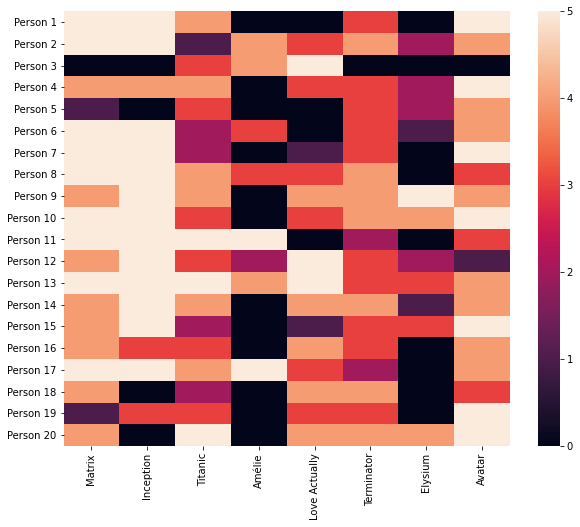

In [9]:
# the choice of colormap
cmap = sns.cm.rocket_r

# indicate figure size
plt.figure(figsize=(10,8))

# draw heatmap
g = sns.heatmap(df.values);

# set tick labes for both x & y axes
g.set_xticklabels(df.columns, rotation=90);
g.set_yticklabels(df.index, rotation=0);

That is actually still a bit tough to read. We cannot accurately tell yet if there are strong connections, correlations, and/or similarities between movies/users.

---

## Collaborative Filtering

### User-based CF
Now, let's implement to [**collaborative filtering**](https://en.wikipedia.org/wiki/Collaborative_filtering). With collaborative filtering, we can explore how users are similar to each other based on the ratings they gave movies using the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) measure. If you can recall,

\begin{equation}
\cos (X,Y) = \frac{\sum_{i=1}^{n} X_i Y_i}{\sqrt {\sum_{i=1}^{n}X_i^2}\sqrt {\sum_{i=1}^{n}Y_i^2}}.
\end{equation}

That is, the similarity of Person $X$ and Person $Y$, in terms of their taste in movies, can be computed by the ratings they gave to the movies ($1$ to $n=8$) where movie 1 corresponds to _The Matrix_, movie 2 to _Inception_, movie 3 to _Titanic_, and so on and so forth.

We define a function `compute_cosine_similarity( )` below that computes the cosine similarity as defined in the equation above. 

In [10]:
def compute_cosine_similarity (p1, p2):
    num_movies = len(p1)
    sumprod = 0
    for i in range(num_movies):
        sumprod = sumprod + (p1[i] * p2[i])
    numerator = sumprod
    denominator = np.sqrt(sum([r1*r1 for r1 in p1])) * np.sqrt(sum([r2*r2 for r2 in p2]))
    return numerator/denominator

Let's use the function above to check how similar (or not) _Person 1_ and _Person 2_ are.

In [11]:
p1 = list(df.loc['Person 1'])
p2 = list(df.loc['Person 2'])
print ('Person 1 and Person 2 are {:.2f}% similar.'.format(compute_cosine_similarity(p1, p2)*100))

Person 1 and Person 2 are 81.26% similar.


Check similarity between Person 4 and Person 3.

In [12]:
p1 = list(df.loc['Person 4'])
p2 = list(df.loc['Person 3'])
print ('Person 4 and Person 3 are {:.2f}% similar.'.format(compute_cosine_similarity(p1, p2)*100))

Person 4 and Person 3 are 39.18% similar.


#### Using a Python library

As mentioned at the beginning, the good news is that we don't have to manually perform this pairwise computation of cosine similarity. We didn't event need to write the function ourselves. Python has a function via the `sklearn` library that computes the cosine similarity of the whole matrix for us.

It's a one liner as you can see in the code cell below. 

In [13]:
user_similarity_matrix = cosine_similarity(df.values)

The result is a 20 x 20 matrix where the numbers of rows and columns correspond to the number of users (in this case, 20) in the data. The element in each cell if the matrix gives us the cosine similarity between two persons.  

In [14]:
user_similarity_matrix.size

400

In [15]:
user_similarity_matrix

array([[1.        , 0.81262362, 0.16970563, 0.92338052, 0.73658951,
        0.92219816, 0.97519805, 0.89077845, 0.81566396, 0.88548292,
        0.85605599, 0.7362357 , 0.80833162, 0.90329585, 0.92219816,
        0.87757241, 0.83984125, 0.70420284, 0.83820084, 0.72117107],
       [0.81262362, 1.        , 0.45434411, 0.86281799, 0.60522753,
        0.94150762, 0.87139535, 0.93221259, 0.85360419, 0.89586351,
        0.84445278, 0.8916428 , 0.9258201 , 0.87188993, 0.88141139,
        0.85104977, 0.92296269, 0.75009757, 0.76802458, 0.71684223],
       [0.16970563, 0.45434411, 1.        , 0.39175718, 0.20380987,
        0.26983141, 0.16489697, 0.52828266, 0.39691115, 0.30357866,
        0.46563307, 0.61591788, 0.6466323 , 0.4395538 , 0.16489697,
        0.47356802, 0.60676739, 0.47078588, 0.43105272, 0.46358632],
       [0.92338052, 0.86281799, 0.39175718, 1.        , 0.80501129,
        0.85915255, 0.92440465, 0.90409231, 0.95383309, 0.97272271,
        0.78177899, 0.86175089, 0.9214786 , 0

Okay. That's a bit tough to read. We can use a heatmap instead. We may view it as a dataframe


In [16]:
pd.DataFrame(user_similarity_matrix, index = df.index, columns = list(df.index))

,Person 1,Person 2,Person 3,Person 4,Person 5,Person 6,Person 7,Person 8,Person 9,Person 10,Person 11,Person 12,Person 13,Person 14,Person 15,Person 16,Person 17,Person 18,Person 19,Person 20
Name,,,,,,,,,,,,,,,,,,,,
Person 1,1.000000,0.812624,0.169706,0.923381,0.736590,0.922198,0.975198,0.890778,0.815664,0.885483,0.856056,0.736236,0.808332,0.903296,0.922198,0.877572,0.839841,0.704203,0.838201,0.721171
Person 2,0.812624,1.000000,0.454344,0.862818,0.605228,0.941508,0.871395,0.932213,0.853604,0.895864,0.844453,0.891643,0.925820,0.871890,0.881411,0.851050,0.922963,0.750098,0.768025,0.716842
Person 3,0.169706,0.454344,1.000000,0.391757,0.203810,0.269831,0.164897,0.528283,0.396911,0.303579,0.465633,0.615918,0.646632,0.439554,0.164897,0.473568,0.606767,0.470786,0.431053,0.463586
Person 4,0.923381,0.862818,0.391757,1.000000,0.805011,0.859153,0.924405,0.904092,0.953833,0.972723,0.781779,0.861751,0.921479,0.976588,0.946155,0.959605,0.852293,0.827587,0.925126,0.893653
Person 5,0.736590,0.605228,0.203810,0.805011,1.000000,0.644995,0.678942,0.628837,0.758385,0.773404,0.572416,0.498135,0.666795,0.715439,0.763810,0.702620,0.570088,0.697079,0.793116,0.884845
Person 6,0.922198,0.941508,0.269831,0.859153,0.644995,1.000000,0.932584,0.923917,0.799524,0.872244,0.927361,0.791400,0.865485,0.844240,0.910112,0.807827,0.919259,0.651450,0.740409,0.655234
Person 7,0.975198,0.871395,0.164897,0.924405,0.678942,0.932584,1.000000,0.893459,0.827415,0.910167,0.807701,0.769417,0.813556,0.916309,0.943820,0.905745,0.841848,0.746454,0.848105,0.704873
Person 8,0.890778,0.932213,0.528283,0.904092,0.628837,0.923917,0.893459,1.000000,0.848470,0.873840,0.919068,0.923694,0.946295,0.939626,0.842694,0.917982,0.961809,0.797141,0.827180,0.744582
Person 9,0.815664,0.853604,0.396911,0.953833,0.758385,0.799524,0.827415,0.848470,1.000000,0.980581,0.701307,0.900372,0.916627,0.937061,0.929680,0.881083,0.776622,0.763611,0.835399,0.887155


From the dataframe above, we can see that Person 1 is 81.26% similar to Person 2 while Person 3 is only 39.18% similar to Person 4.

We can display the dataframe above as a heatmap. The darker the cell color is the more similar two persons are.

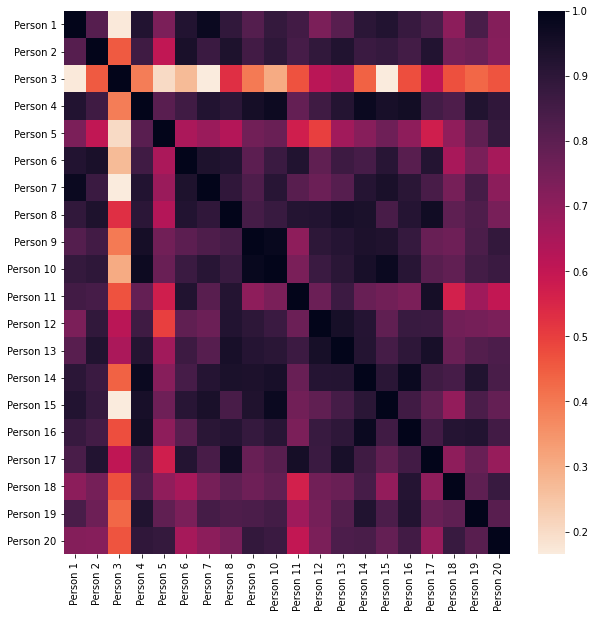

In [17]:
plt.figure(figsize=(10,10))
g = sns.heatmap(user_similarity_matrix, cmap = cmap)
g.set_xticklabels(df.index, rotation=90);
g.set_yticklabels(df.index, rotation=0);

### Item-based CF

How about instead of user-based, we use item-based?

The method/approach is exactly the same. We'll just transpose our original dataframe; i.e., our rows are now the movie names, while the columns are the individual users.

In [18]:
df_t = df.transpose()

In [19]:
df_t

Name,Person 1,Person 2,Person 3,Person 4,Person 5,Person 6,Person 7,Person 8,Person 9,Person 10,Person 11,Person 12,Person 13,Person 14,Person 15,Person 16,Person 17,Person 18,Person 19,Person 20
Matrix,5,5,0,4,1,5,5,5,4,5,5,4,5,4,4,4,5,4,1,4
Inception,5,5,0,4,0,5,5,5,5,5,5,5,5,5,5,3,5,0,3,0
Titanic,4,1,3,4,3,2,2,4,4,3,5,3,5,4,2,3,4,2,3,5
Amélie,0,4,4,0,0,3,0,3,0,0,5,2,4,0,0,0,5,0,0,0
Love Actually,0,3,5,3,0,0,1,3,4,3,0,5,5,4,1,4,3,4,3,4
Terminator,3,4,0,3,3,3,3,4,4,4,2,3,3,4,3,3,2,4,3,4
Elysium,0,2,0,2,2,1,0,0,5,4,0,2,3,1,3,0,0,0,0,4
Avatar,5,4,0,5,4,4,5,3,4,5,3,1,4,4,5,4,4,3,5,5


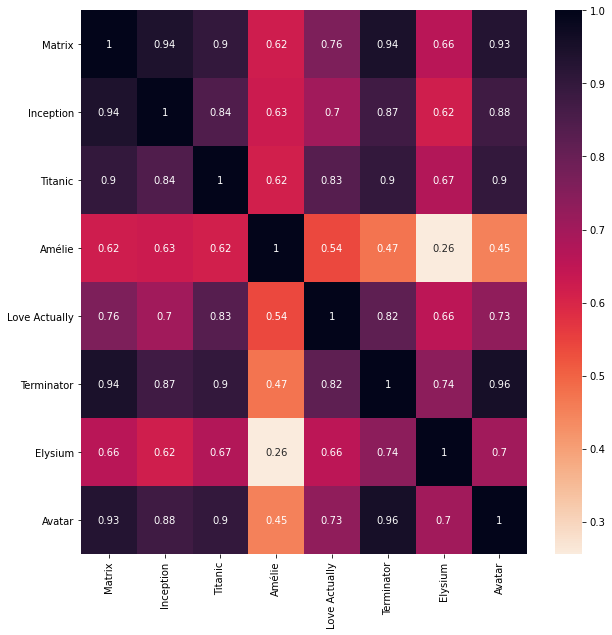

In [20]:
movie_similarity_matrix = cosine_similarity(df_t)
plt.figure(figsize=(10,10))
g = sns.heatmap(movie_similarity_matrix, cmap = cmap, annot=True)
g.set_xticklabels(df_t.index, rotation=90);
g.set_yticklabels(df_t.index, rotation=0);

See if you can confirm the following statements:
- Among the other movies in the list and according to the preferences of EMBA 2019 students, _Avatar_ is most similar to _Terminator_. 
- Among the other movies in the list and according to the preferences of EMBA 2019 students, _The Matrix_ is most similar to both _Inception_ and _Terminator_. 

---
## Going back to the Users
Can we maybe cluster the users instead based on the ratings they gave the eight (8) movies, at most?

Definitely. And one of the most basic methods we can use is [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering). With $k$-means, we need to indicate the number of clusters $k$ we want our users to be grouped into. 

Let us once again use `sklearn` to implement k-means.

In [21]:
from sklearn.cluster import KMeans

In [22]:
# setting k = 4 means that we're expecting 4 groupings in the EMBA 2019 cohort based
# on their movie ratings.
k = 4
kmeans = KMeans(n_clusters=k).fit(df.values)

In [23]:
cluster_labels = kmeans.labels_

Below, we print the groupings.

In [24]:
groupings = {}
for c in range(k):
    groupings[c] = []
    
persons = list(df.index)
i = 0
for i in range(len(persons)):
    groupings[cluster_labels[i]].append(persons[i])

for group, people in groupings.items():
    print ('Group #{}: {}'.format(group, people))

Group #0: ['Person 1', 'Person 4', 'Person 7', 'Person 9', 'Person 10', 'Person 14', 'Person 15', 'Person 16', 'Person 19']
Group #1: ['Person 2', 'Person 6', 'Person 8', 'Person 11', 'Person 12', 'Person 13', 'Person 17']
Group #2: ['Person 5', 'Person 18', 'Person 20']
Group #3: ['Person 3']


$k$-means is actually on of the most basic and (arguably) on of the more popular _unsupervised_ machine learning algorithms out there.  
 
### Assigning _new_ users to existing groups. 
With a model generated using our dataframe, we can now assign (or "predict") new users to the generated clusters. 

Say, for example, our new user has given our movies the following ratings:
- The Matrix: 0 
- Inception: 0 
- Titanic: 3
- Amelie: 2
- Love Actually: 5
- Terminator: 5
- Elysium: 5
- Avatar: 3

In [25]:
kmeans.predict([[0,0,3,2,5,5,5,3]])

array([2], dtype=int32)

What if we have another new user? 

- The Matrix: 5
- Inception: 5
- Titanic: 5
- Amelie: 2
- Love Actually: 5
- Terminator: 1
- Elysium: 1
- Avatar: 3

In [26]:
kmeans.predict([[5,5,5,2,5,1,1,3]])

array([1], dtype=int32)

And another one?

In [27]:
kmeans.predict([[1,1,5,2,5,1,1,3]])

array([3], dtype=int32)

---

## Summary and Some Notes

- Showed how to load a MS Excel file into a dataframe.
- Showed how to implement collaborative filtering in Python:
    - user-user
    - item-item
- Introduced (for demo) $k$-means clustering, an unsupervised ML model, to cluster users based on what they've watched and their taste in movies.
    - For the $k$-means clustering demo above, we explicitly chose the size of $k$. There are, of course, ways on how to systematically find the "right" number of clusters (e.g., using intertia plots), but they are beyond the scope of this intro to Python and Vanilla Collaborative Filtering method.  
    - Once you learn more about the math/science behind $k$-means, you'll also realize that the membership of clusters may change for every run. This is because $k$-means starts by _randomly_ creating $k$ centroids, which are the points it uses to cluster the data points, which is based on their distance from the centroids.   

